In [1]:
import pandas as pd
import numpy as np

In [20]:
import pymysql
from sqlalchemy import create_engine
pymysql.install_as_MySQLdb()
import MySQLdb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
skd = pd.read_csv('SeoulTemp_Kospi_Kosdaq_drop1.csv')

In [3]:
skd

,Unnamed: 0,지점명,date,평균기온(℃),최고기온(℃),kospi,volume_kospi,amount_kospi,kosdaq,volume_kosdaq,amount_kosdaq
0,1,서울,2001-01-02,-4.3,-0.2,520.95,23101.0,12233.0,NaN,NaN,NaN
1,2,서울,2001-01-03,-8.3,-5.2,521.43,32458.0,15834.0,NaN,NaN,NaN
2,3,서울,2001-01-04,-9.8,-6.7,558.02,44454.0,29848.0,NaN,NaN,NaN
3,4,서울,2001-01-05,-6.8,-2.2,580.85,57829.0,35696.0,NaN,NaN,NaN
4,7,서울,2001-01-08,2.0,4.9,586.65,55865.0,29481.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5177,7661,서울,2021-12-24,-0.3,3.2,3012.43,53015.0,84694.0,1007.42,123576.0,108664.0
5178,7664,서울,2021-12-27,-7.6,-3.9,2999.55,46290.0,81341.0,1011.36,115153.0,100446.0
5179,7665,서울,2021-12-28,-4.1,-0.9,3020.24,59323.0,118684.0,1027.44,128675.0,132431.0
5180,7666,서울,2021-12-29,0.4,5.9,2993.29,53660.0,108018.0,1028.05,95094.0,116836.0


In [5]:
skd_2001 = skd[skd['date'].between('2001-05-01','2001-09-30')] #2001년 여름
skd_2001

,Unnamed: 0,지점명,date,평균기온(℃),최고기온(℃),kospi,volume_kospi,amount_kospi,kosdaq,volume_kosdaq,amount_kosdaq
80,121,서울,2001-05-02,16.2,20.3,583.70,59462.0,23570.0,NaN,NaN,NaN
81,122,서울,2001-05-03,16.1,22.0,584.40,39007.0,18124.0,NaN,NaN,NaN
82,123,서울,2001-05-04,15.0,19.1,585.60,39247.0,16758.0,NaN,NaN,NaN
83,126,서울,2001-05-07,18.3,22.5,596.50,47172.0,21111.0,NaN,NaN,NaN
84,127,서울,2001-05-08,20.4,27.9,590.91,48440.0,21069.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
180,266,서울,2001-09-24,19.0,24.8,482.19,53875.0,16138.0,NaN,NaN,NaN
181,267,서울,2001-09-25,21.3,26.9,472.13,64013.0,19565.0,NaN,NaN,NaN
182,268,서울,2001-09-26,21.1,26.2,472.85,42340.0,13226.0,NaN,NaN,NaN
183,269,서울,2001-09-27,21.4,26.5,472.38,45327.0,13222.0,NaN,NaN,NaN


In [14]:
skd_2001.sort_values('최고기온(℃)', ascending=False) #2001년 여름 최고기온 내림차순

,Unnamed: 0,지점명,date,평균기온(℃),최고기온(℃),kospi,volume_kospi,amount_kospi,kosdaq,volume_kosdaq,amount_kosdaq
154,228,서울,2001-08-17,30.0,35.3,580.99,43737.0,18041.0,NaN,NaN,NaN
153,227,서울,2001-08-16,28.1,34.2,580.95,52565.0,21196.0,NaN,NaN,NaN
144,213,서울,2001-08-02,28.7,34.0,567.46,44570.0,19504.0,NaN,NaN,NaN
139,206,서울,2001-07-26,28.5,32.8,529.22,31319.0,10952.0,NaN,NaN,NaN
146,217,서울,2001-08-06,28.3,32.6,569.37,37543.0,12563.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
80,121,서울,2001-05-02,16.2,20.3,583.70,59462.0,23570.0,NaN,NaN,NaN
92,137,서울,2001-05-18,17.9,20.1,600.54,59540.0,25425.0,NaN,NaN,NaN
82,123,서울,2001-05-04,15.0,19.1,585.60,39247.0,16758.0,NaN,NaN,NaN
89,134,서울,2001-05-15,16.1,19.0,581.30,55755.0,19477.0,NaN,NaN,NaN


In [15]:
skd_2002 = skd[skd['date'].between('2002-05-01','2002-09-30')]
skd_2003 = skd[skd['date'].between('2003-05-01','2003-09-30')]
skd_2004 = skd[skd['date'].between('2004-05-01','2004-09-30')]
skd_2005 = skd[skd['date'].between('2005-05-01','2005-09-30')]
skd_2006 = skd[skd['date'].between('2006-05-01','2006-09-30')]
skd_2007 = skd[skd['date'].between('2007-05-01','2007-09-30')]
skd_2008 = skd[skd['date'].between('2008-05-01','2008-09-30')]
skd_2009 = skd[skd['date'].between('2009-05-01','2009-09-30')]
skd_2010 = skd[skd['date'].between('2010-05-01','2010-09-30')]
skd_2011 = skd[skd['date'].between('2011-05-01','2011-09-30')]
skd_2012 = skd[skd['date'].between('2012-05-01','2012-09-30')]
skd_2013 = skd[skd['date'].between('2013-05-01','2013-09-30')]
skd_2014 = skd[skd['date'].between('2014-05-01','2014-09-30')]
skd_2015 = skd[skd['date'].between('2015-05-01','2015-09-30')]
skd_2016 = skd[skd['date'].between('2016-05-01','2016-09-30')]
skd_2017 = skd[skd['date'].between('2017-05-01','2017-09-30')]
skd_2018 = skd[skd['date'].between('2018-05-01','2018-09-30')]
skd_2019 = skd[skd['date'].between('2019-05-01','2019-09-30')]
skd_2020 = skd[skd['date'].between('2020-05-01','2020-09-30')]
skd_2021 = skd[skd['date'].between('2021-05-01','2021-09-30')] #20년치 여름 정보

<AxesSubplot:xlabel='kospi', ylabel='Count'>

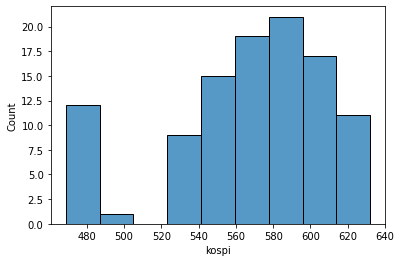

In [22]:
sns.histplot(data=skd_2001, x='kospi')

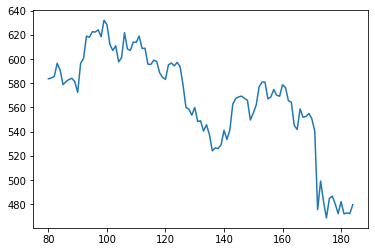

In [23]:
plt.plot(skd_2001['kospi'])

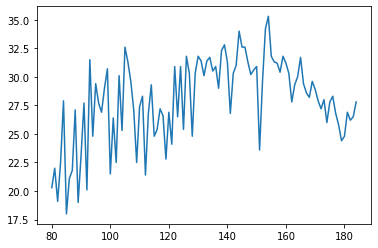

In [24]:
plt.plot(skd_2001['최고기온(℃)'])

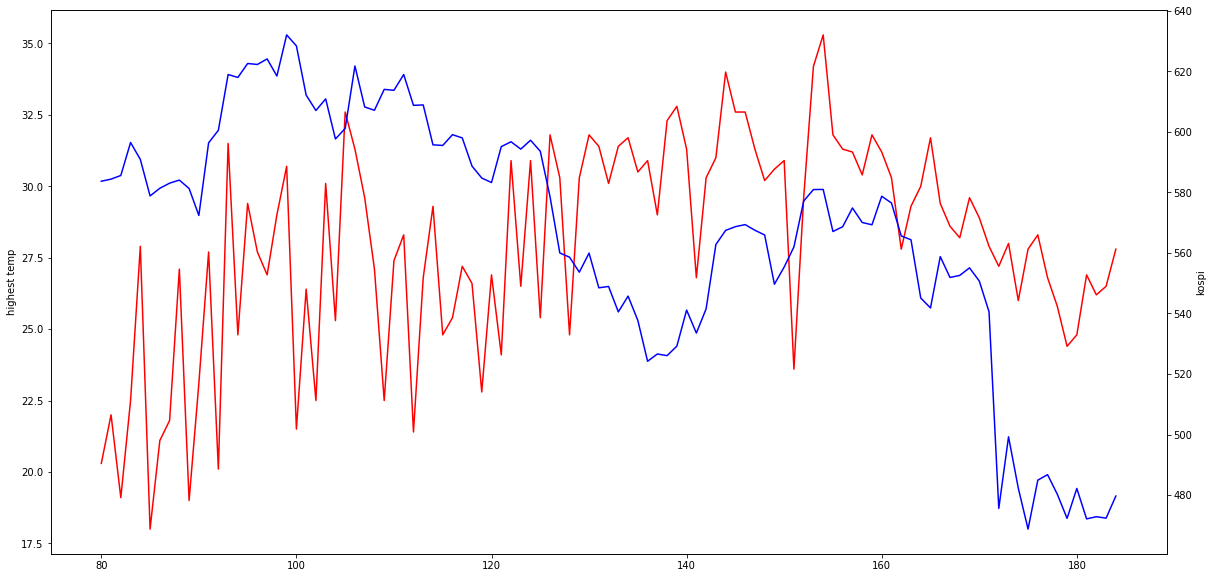

In [25]:
plt.figure( figsize=(20,10) )
plt.plot(skd_2001['최고기온(℃)'], color='red')
plt.ylabel('highest temp')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2001['kospi'], color = 'blue')
ax2.set_ylabel('kospi')

plt.show()

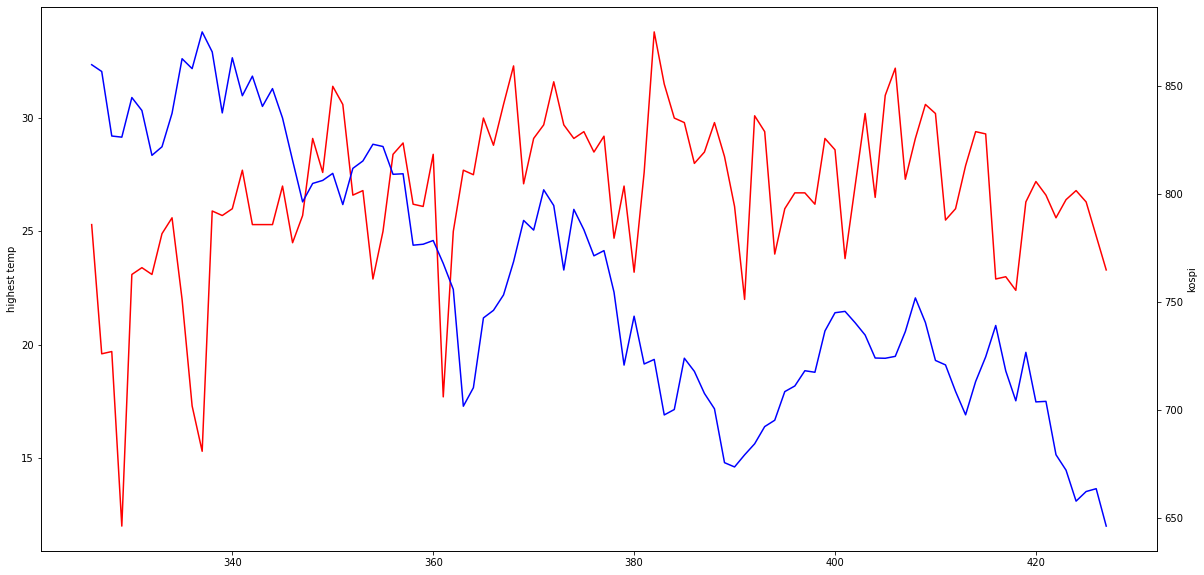

In [26]:
plt.figure( figsize=(20,10) )
plt.plot(skd_2002['최고기온(℃)'], color='red')
plt.ylabel('highest temp')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2002['kospi'], color = 'blue')
ax2.set_ylabel('kospi')

plt.show()

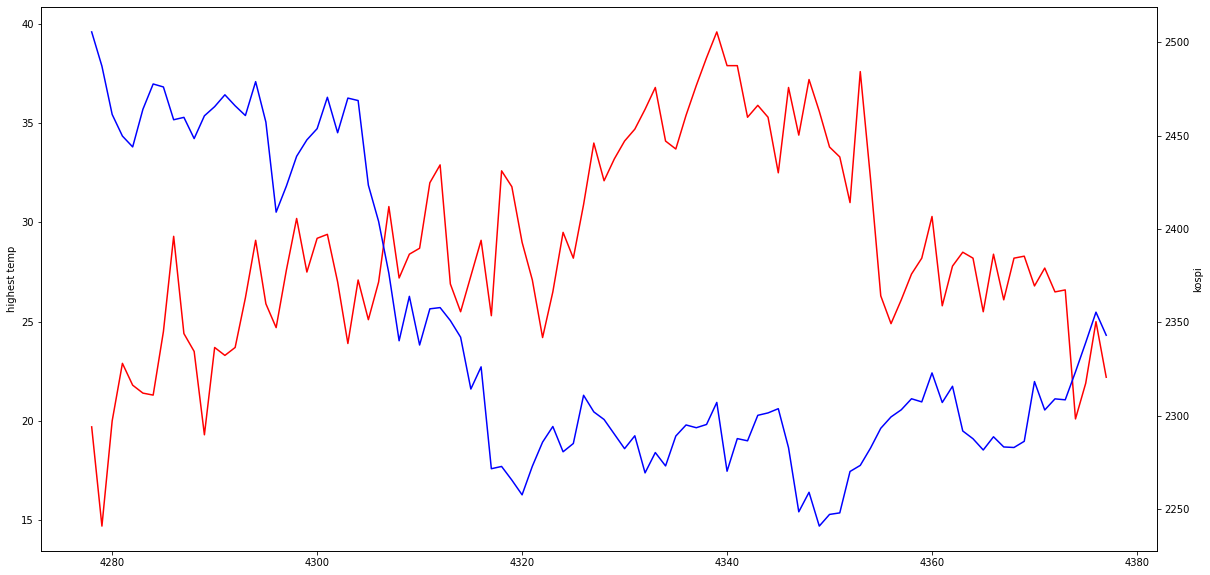

In [27]:
plt.figure( figsize=(20,10) )
plt.plot(skd_2018['최고기온(℃)'], color='red')
plt.ylabel('highest temp')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2018['kospi'], color = 'blue')
ax2.set_ylabel('kospi')

plt.show()

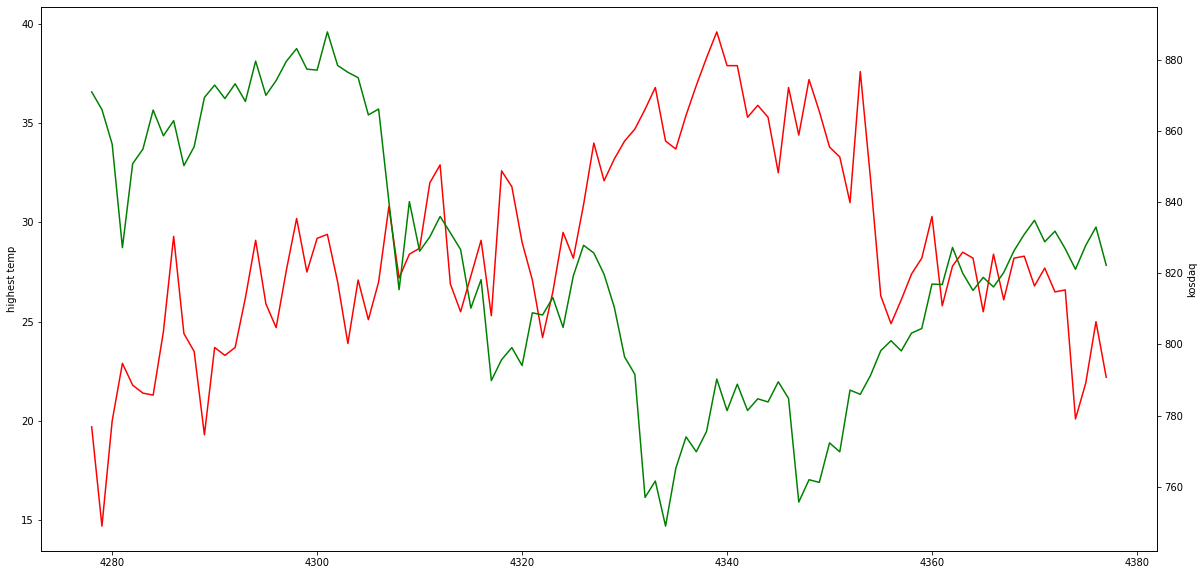

In [32]:
plt.figure( figsize=(20,10) )
plt.plot(skd_2018['최고기온(℃)'], color='red')
plt.ylabel('highest temp')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2018['kosdaq'], color = 'green')
ax2.set_ylabel('kosdaq')

plt.show()

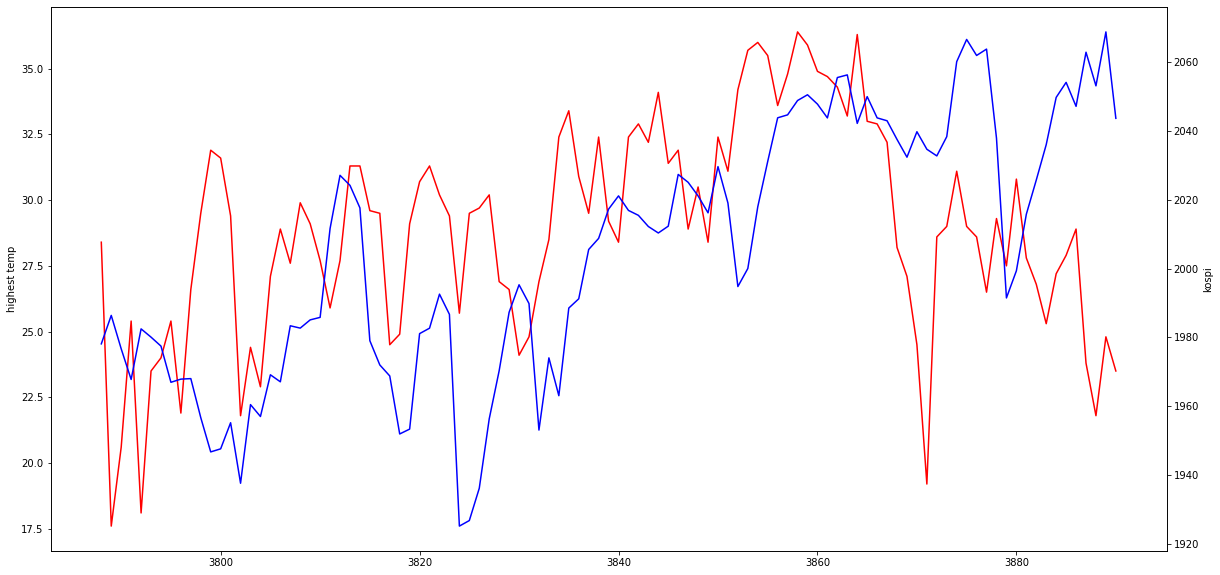

In [28]:
plt.figure( figsize=(20,10) )
plt.plot(skd_2016['최고기온(℃)'], color='red')
plt.ylabel('highest temp')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2016['kospi'], color = 'blue')
ax2.set_ylabel('kospi')

plt.show()

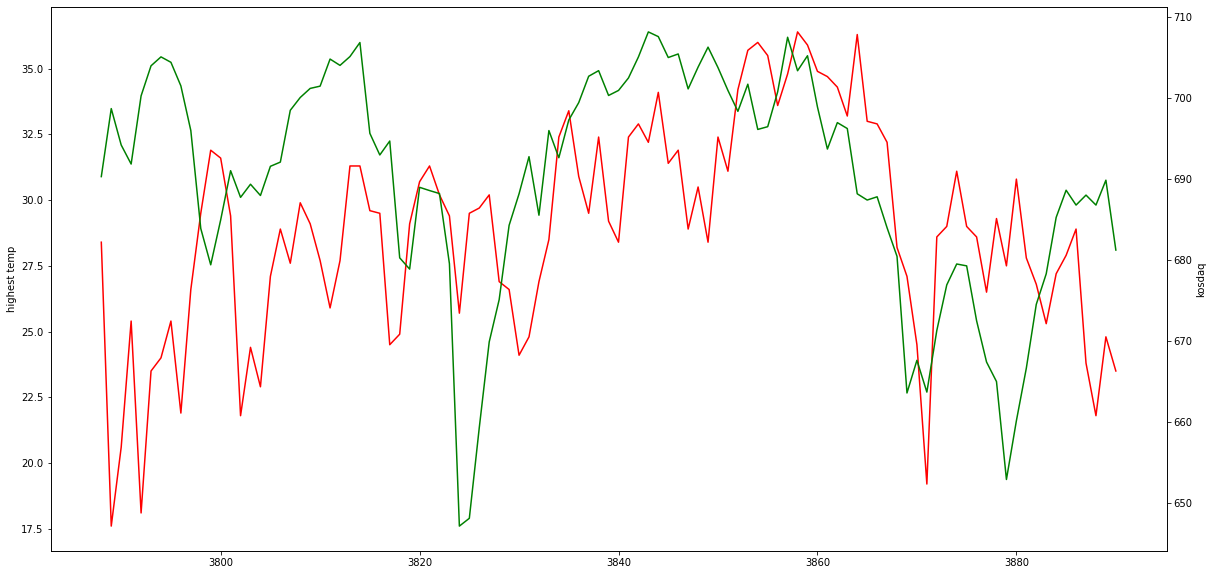

In [33]:
plt.figure( figsize=(20,10) )
plt.plot(skd_2016['최고기온(℃)'], color='red')
plt.ylabel('highest temp')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2016['kosdaq'], color = 'green')
ax2.set_ylabel('kosdaq')

plt.show()

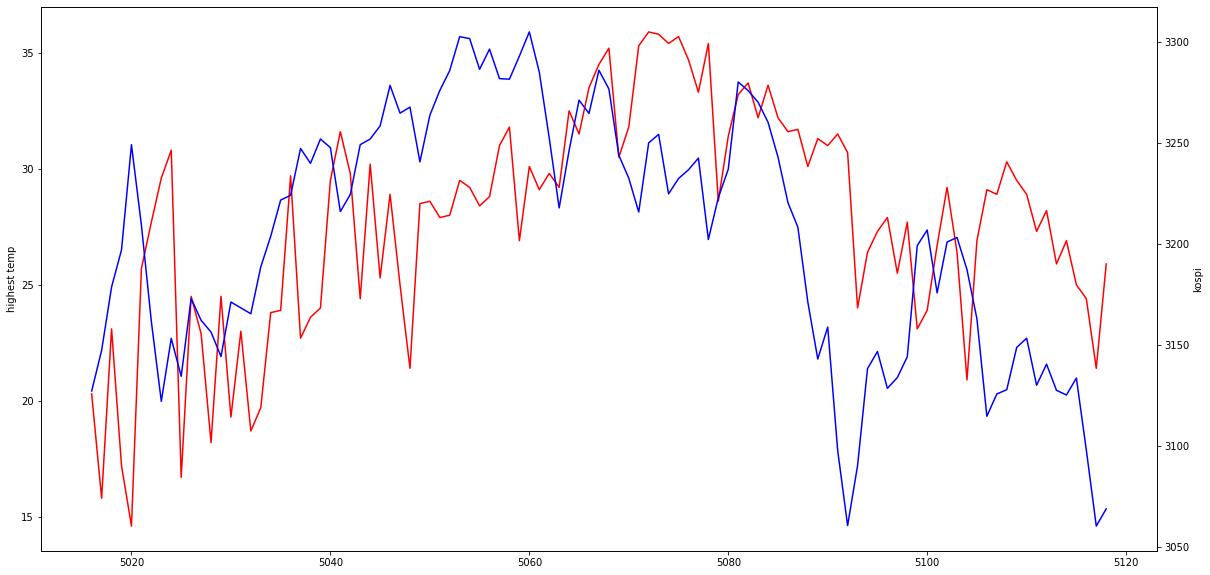

In [29]:
plt.figure( figsize=(20,10) )
plt.plot(skd_2021['최고기온(℃)'], color='red')
plt.ylabel('highest temp')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2021['kospi'], color = 'blue')
ax2.set_ylabel('kospi')

plt.show()

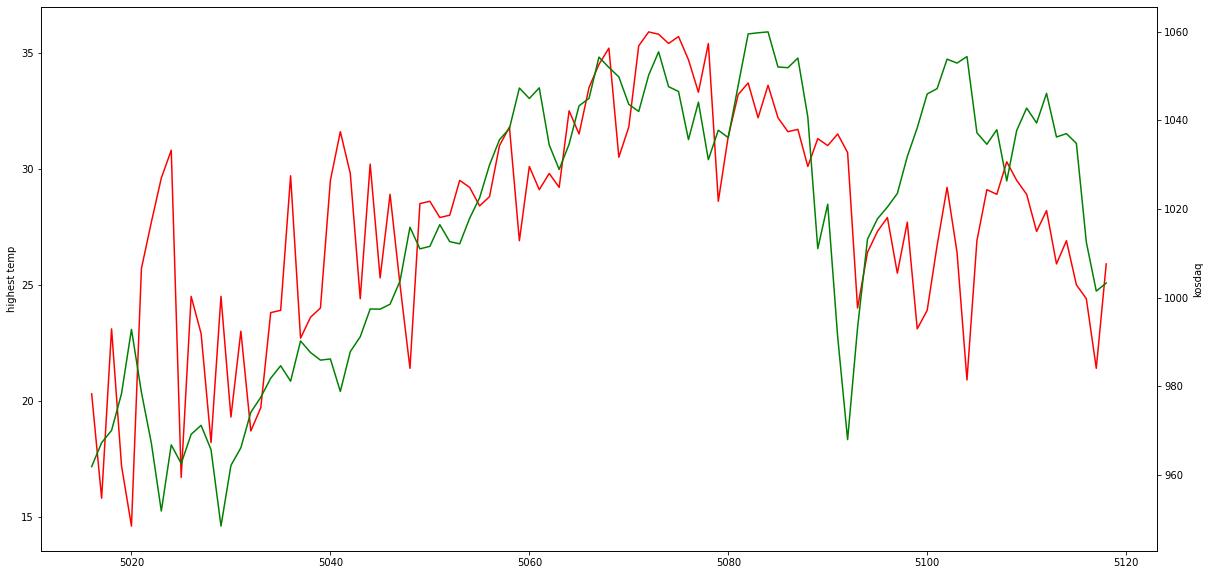

In [34]:
plt.figure( figsize=(20,10) )
plt.plot(skd_2021['최고기온(℃)'], color='red')
plt.ylabel('highest temp')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2021['kosdaq'], color = 'green')
ax2.set_ylabel('kosdaq')

plt.show()

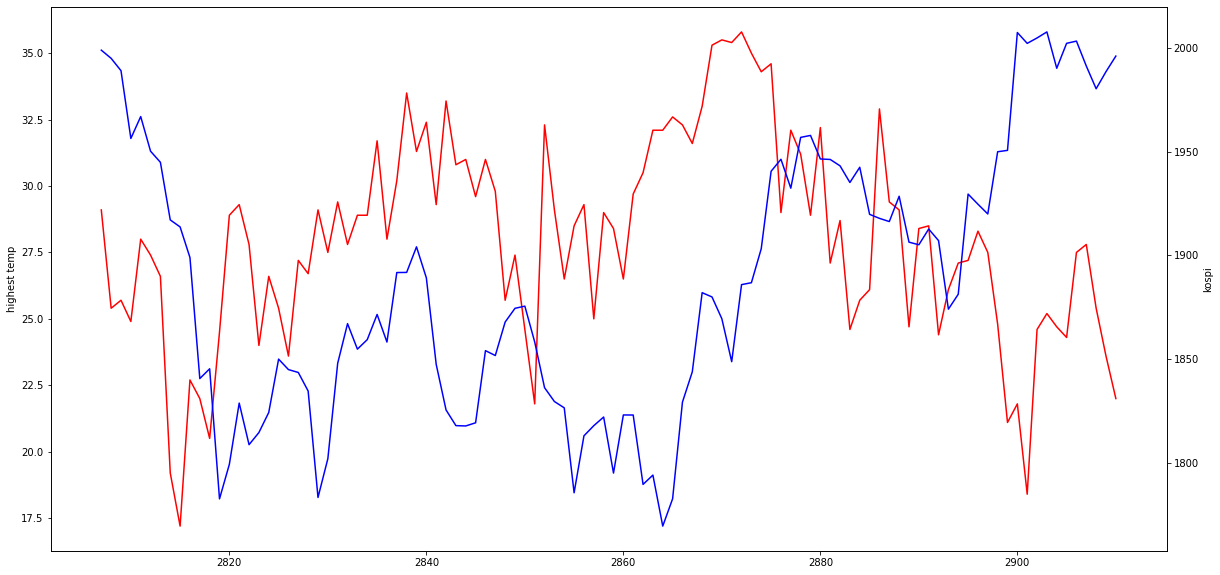

In [30]:
plt.figure( figsize=(20,10) )
plt.plot(skd_2012['최고기온(℃)'], color='red')
plt.ylabel('highest temp')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2012['kospi'], color = 'blue')
ax2.set_ylabel('kospi')

plt.show()

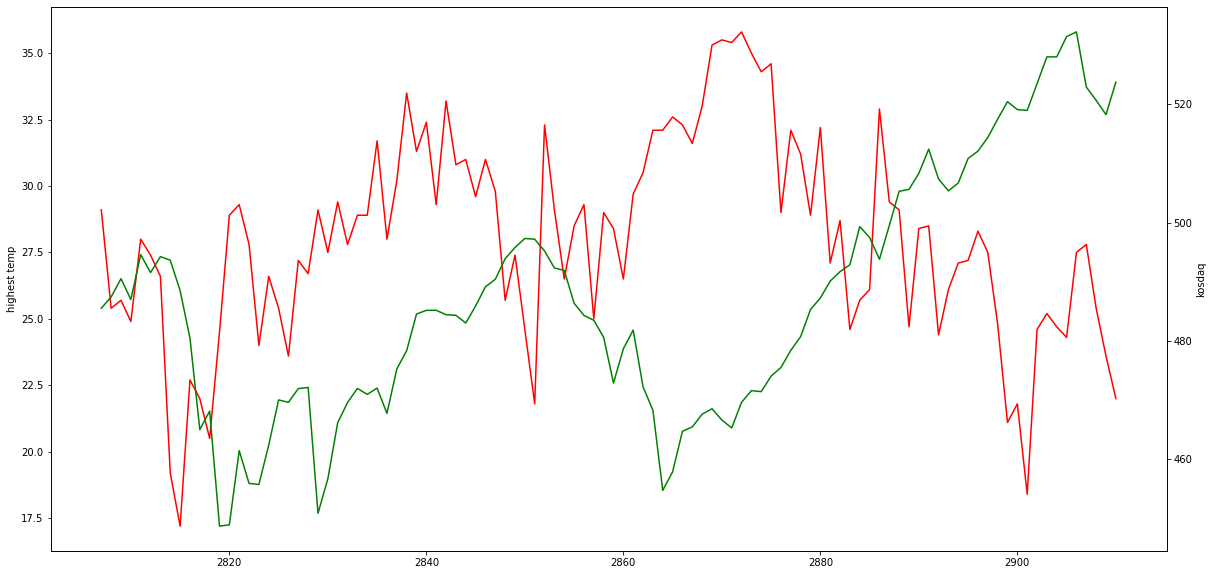

In [35]:
plt.figure( figsize=(20,10) )
plt.plot(skd_2012['최고기온(℃)'], color='red')
plt.ylabel('highest temp')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2012['kosdaq'], color = 'green')
ax2.set_ylabel('kosdaq')

plt.show()

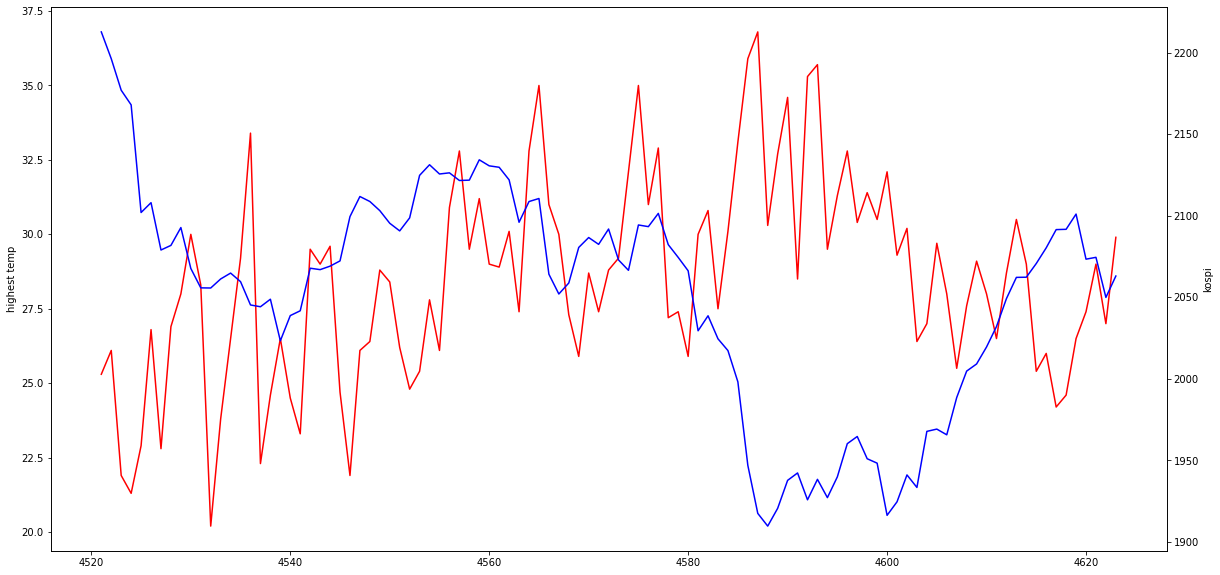

In [31]:
plt.figure( figsize=(20,10) )
plt.plot(skd_2019['최고기온(℃)'], color='red')
plt.ylabel('highest temp')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2019['kospi'], color = 'blue')
ax2.set_ylabel('kospi')

plt.show()

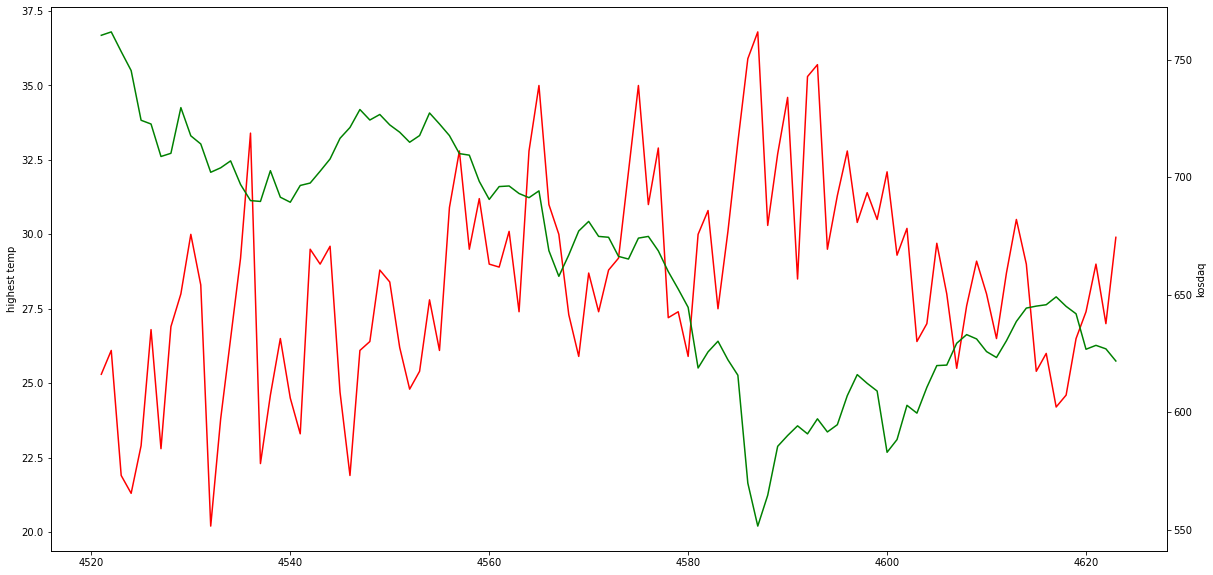

In [36]:
plt.figure( figsize=(20,10) )
plt.plot(skd_2019['최고기온(℃)'], color='red')
plt.ylabel('highest temp')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2019['kosdaq'], color = 'green')
ax2.set_ylabel('kosdaq')

plt.show()

In [38]:
skd_2012.corr()

,Unnamed: 0,평균기온(℃),최고기온(℃),kospi,volume_kospi,amount_kospi,kosdaq,volume_kosdaq,amount_kosdaq
Unnamed: 0,1.000000,0.230477,0.041921,0.442031,0.476310,0.199734,0.659848,0.560741,0.636335
평균기온(℃),0.230477,1.000000,0.921689,-0.289942,-0.445182,-0.300989,-0.345344,-0.121785,-0.376649
최고기온(℃),0.041921,0.921689,1.000000,-0.301926,-0.484665,-0.308953,-0.417117,-0.224982,-0.452897
kospi,0.442031,-0.289942,-0.301926,1.000000,0.588239,0.442064,0.734918,0.210245,0.580171
volume_kospi,0.476310,-0.445182,-0.484665,0.588239,1.000000,0.613985,0.639482,0.436530,0.706530
amount_kospi,0.199734,-0.300989,-0.308953,0.442064,0.613985,1.000000,0.311034,0.227917,0.388574
kosdaq,0.659848,-0.345344,-0.417117,0.734918,0.639482,0.311034,1.000000,0.665279,0.860492
volume_kosdaq,0.560741,-0.121785,-0.224982,0.210245,0.436530,0.227917,0.665279,1.000000,0.818417
amount_kosdaq,0.636335,-0.376649,-0.452897,0.580171,0.706530,0.388574,0.860492,0.818417,1.000000


<AxesSubplot:>

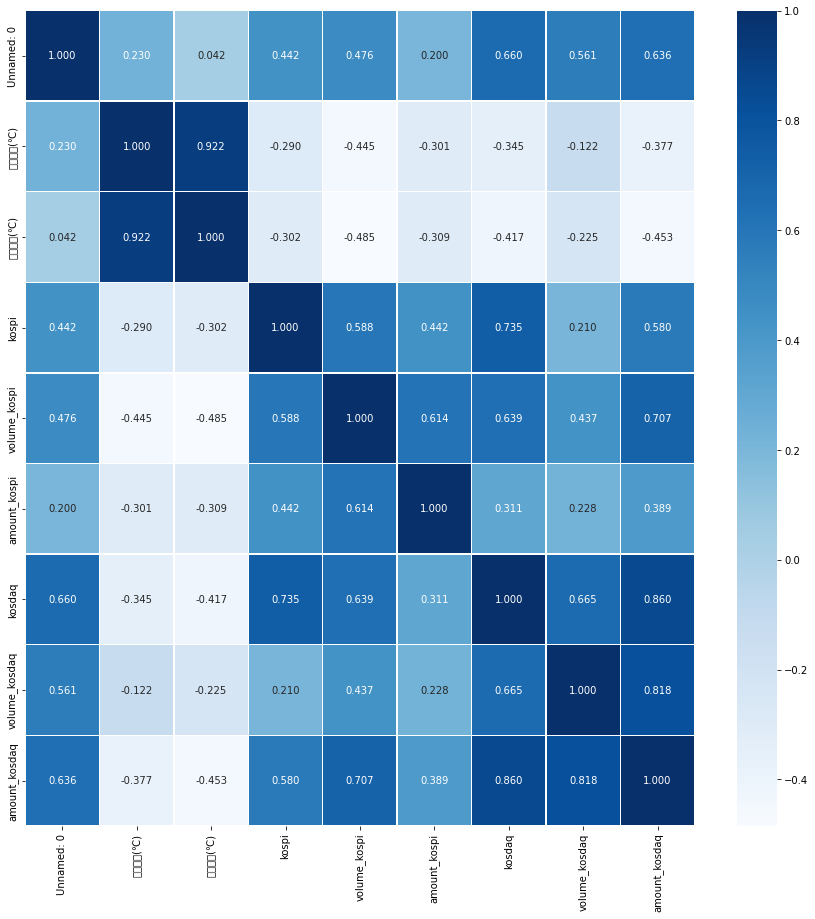

In [42]:
plt.figure(figsize = (15,15))
sns.heatmap(data=skd_2012.corr(), annot=True, fmt='.3f', linewidths=.5, cmap='Blues')

<AxesSubplot:xlabel='kospi', ylabel='최고기온(℃)'>

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_te

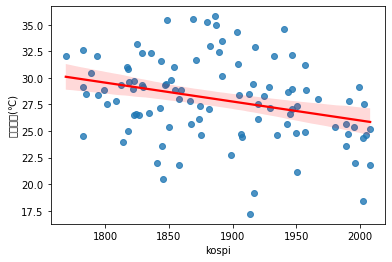

In [44]:
sns.regplot(data=skd_2012, x='kospi', y='최고기온(℃)', line_kws={'color':'red'})

<AxesSubplot:xlabel='kosdaq', ylabel='최고기온(℃)'>

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_te

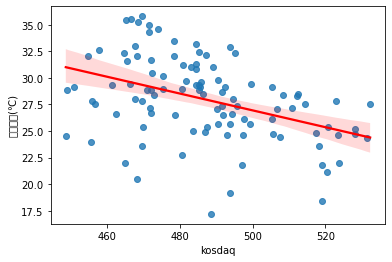

In [45]:
sns.regplot(data=skd_2012, x='kosdaq', y='최고기온(℃)', line_kws={'color':'red'})

<AxesSubplot:xlabel='kospi', ylabel='최고기온(℃)'>

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_te

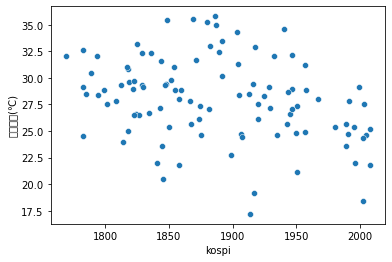

In [46]:
sns.scatterplot(data=skd_2012, x='kospi', y='최고기온(℃)' )

<AxesSubplot:xlabel='kosdaq', ylabel='최고기온(℃)'>

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_te

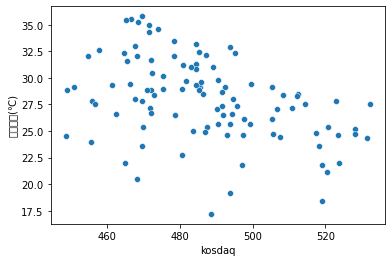

In [47]:
sns.scatterplot(data=skd_2012, x='kosdaq', y='최고기온(℃)' )

<AxesSubplot:xlabel='date', ylabel='kospi'>

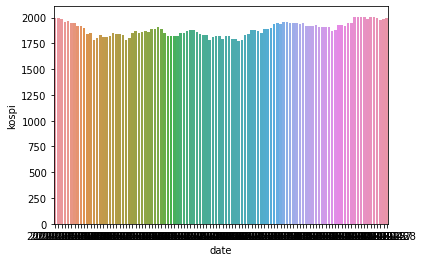

In [48]:
sns.barplot(data=skd_2012, x='date', y='kospi')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_

<AxesSubplot:>

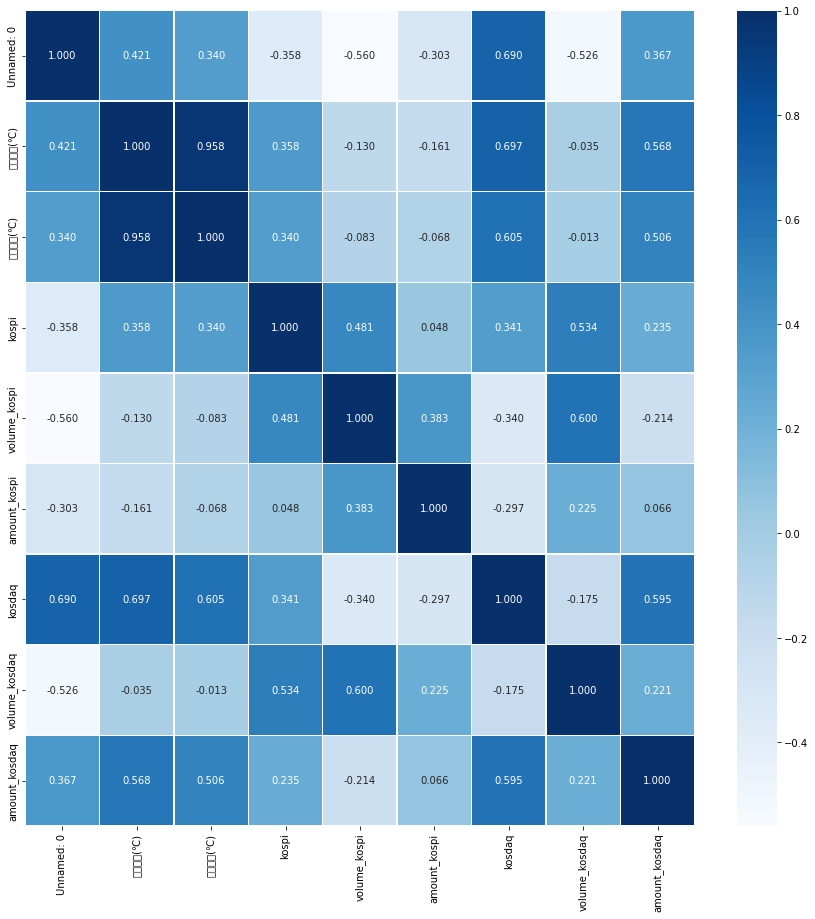

In [49]:
plt.figure(figsize = (15,15))
sns.heatmap(data=skd_2021.corr(), annot=True, fmt='.3f', linewidths=.5, cmap='Blues')

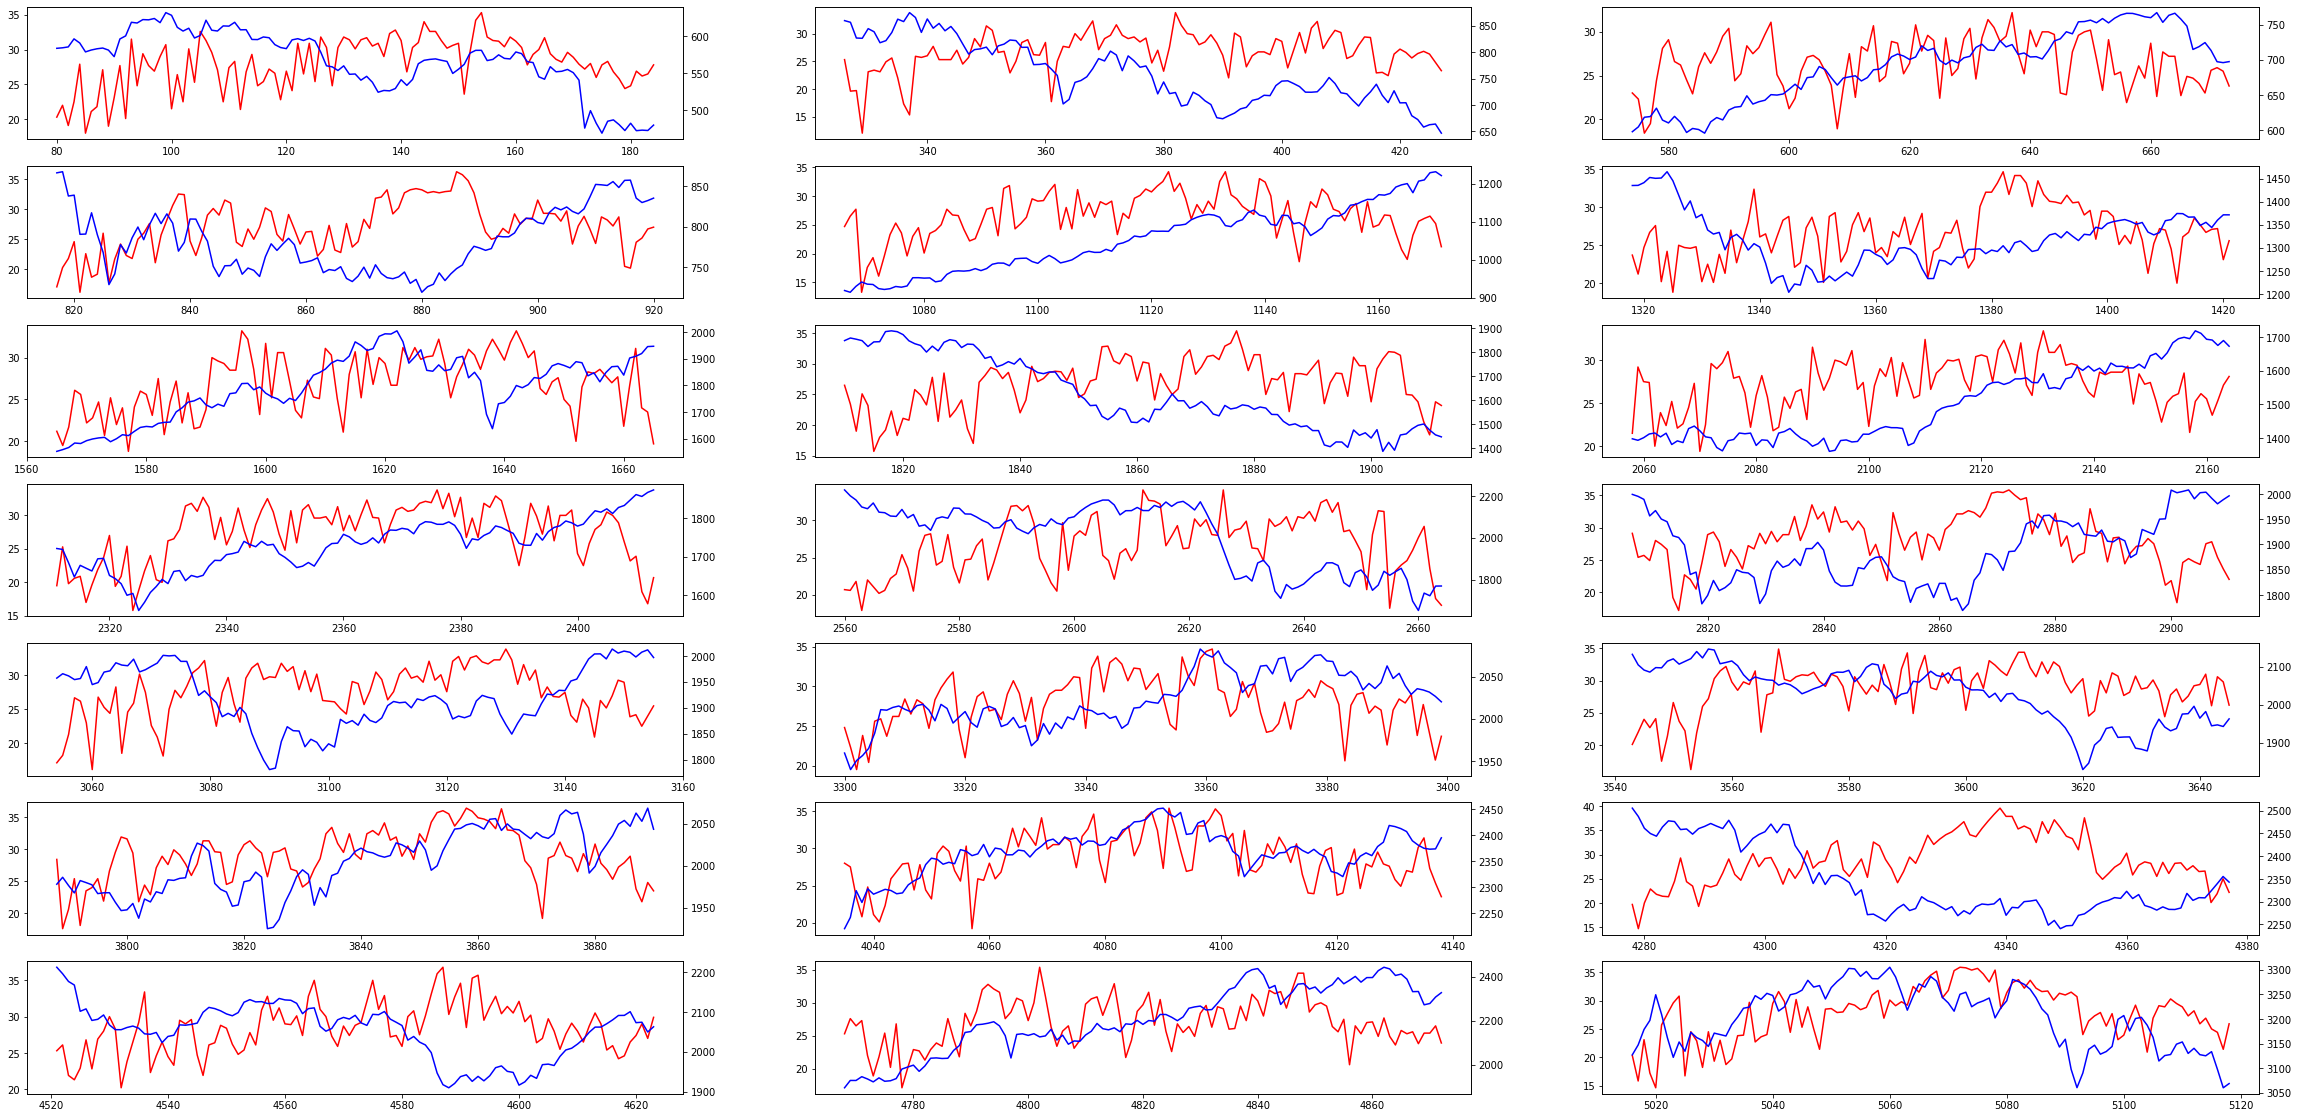

In [107]:
plt.figure(figsize=(40,20))

plt.subplot(7,3,1)
plt.plot(skd_2001['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2001['kospi'], color = 'blue')

plt.subplot(7,3,2)
plt.plot(skd_2002['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2002['kospi'], color = 'blue')

plt.subplot(7,3,3)
plt.plot(skd_2003['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2003['kospi'], color = 'blue')

plt.subplot(7,3,4)
plt.plot(skd_2004['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2004['kospi'], color = 'blue')

plt.subplot(7,3,5)
plt.plot(skd_2005['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2005['kospi'], color = 'blue')

plt.subplot(7,3,6)
plt.plot(skd_2006['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2006['kospi'], color = 'blue')

plt.subplot(7,3,7)
plt.plot(skd_2007['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2007['kospi'], color = 'blue')

plt.subplot(7,3,8)
plt.plot(skd_2008['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2008['kospi'], color = 'blue')

plt.subplot(7,3,9)
plt.plot(skd_2009['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2009['kospi'], color = 'blue')

plt.subplot(7,3,10)
plt.plot(skd_2010['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2010['kospi'], color = 'blue')

plt.subplot(7,3,11)
plt.plot(skd_2011['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2011['kospi'], color = 'blue')

plt.subplot(7,3,12)
plt.plot(skd_2012['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2012['kospi'], color = 'blue')

plt.subplot(7,3,13)
plt.plot(skd_2013['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2013['kospi'], color = 'blue')

plt.subplot(7,3,14)
plt.plot(skd_2014['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2014['kospi'], color = 'blue')

plt.subplot(7,3,15)
plt.plot(skd_2015['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2015['kospi'], color = 'blue')

plt.subplot(7,3,16)
plt.plot(skd_2016['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2016['kospi'], color = 'blue')

plt.subplot(7,3,17)
plt.plot(skd_2017['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2017['kospi'], color = 'blue')

plt.subplot(7,3,18)
plt.plot(skd_2018['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2018['kospi'], color = 'blue')

plt.subplot(7,3,19)
plt.plot(skd_2019['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2019['kospi'], color = 'blue')

plt.subplot(7,3,20)
plt.plot(skd_2020['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2020['kospi'], color = 'blue')

plt.subplot(7,3,21)
plt.plot(skd_2021['최고기온(℃)'], color='red')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(skd_2021['kospi'], color = 'blue')


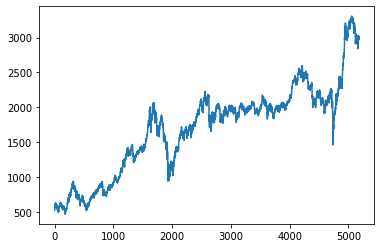

In [109]:
plt.plot(skd['kospi'])

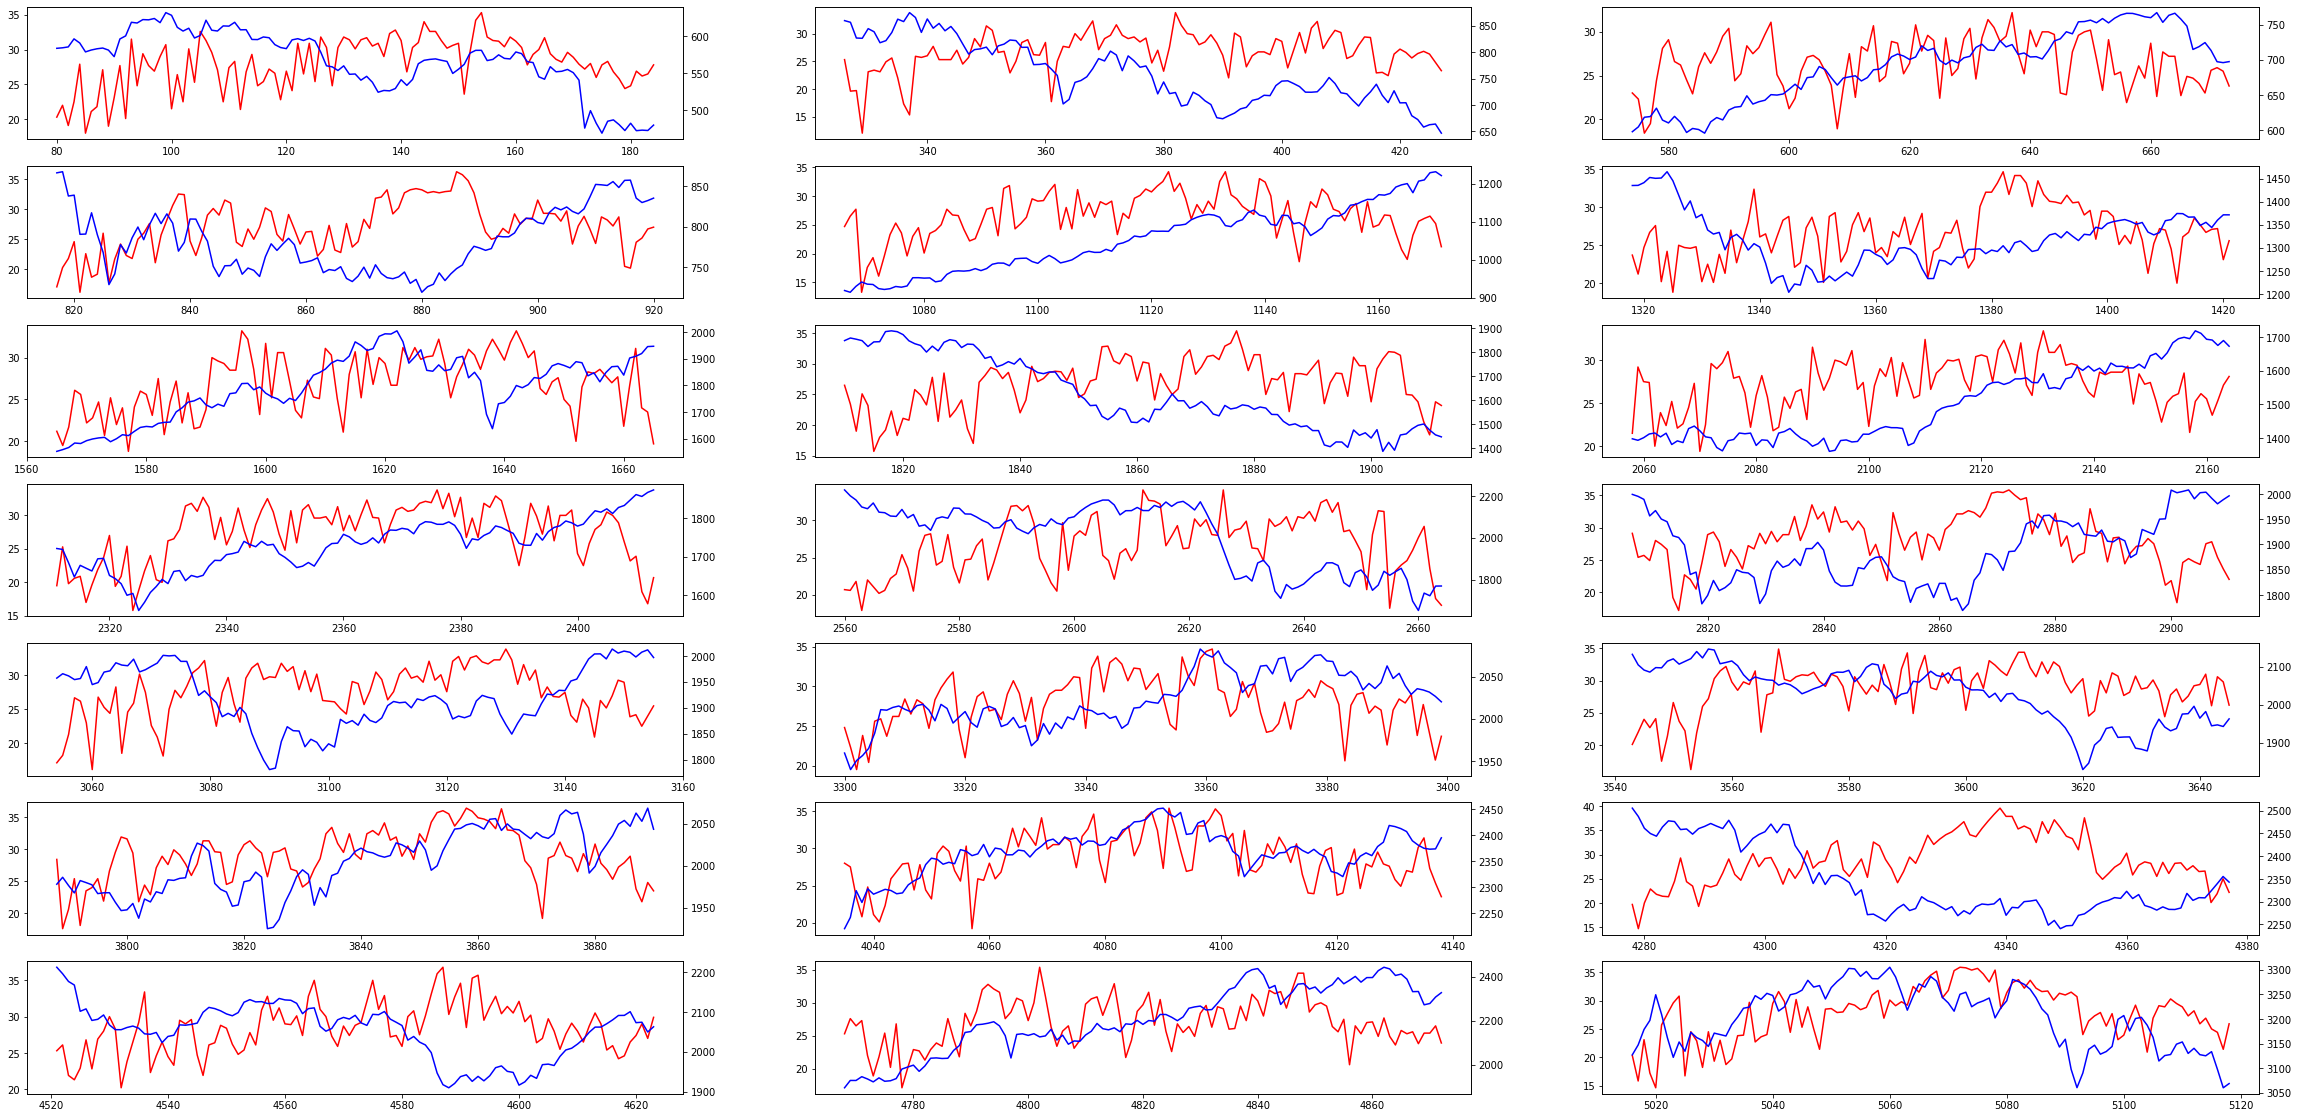

In [125]:
plt.figure(figsize = (40,20)) #2001년부터 2021년까지 최고기온과 kospi 총집합

for i in range(2001,2022):
    globals()['skd_{}'.format(i)] = skd[skd['date'].between('{}-05-01'.format(i),'{}-09-30'.format(i))]
    
    plt.subplot(7,3,i-2000)
    plt.plot(globals()['skd_{}'.format(i)]['최고기온(℃)'], color='red')
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.plot(globals()['skd_{}'.format(i)]['kospi'], color='blue')


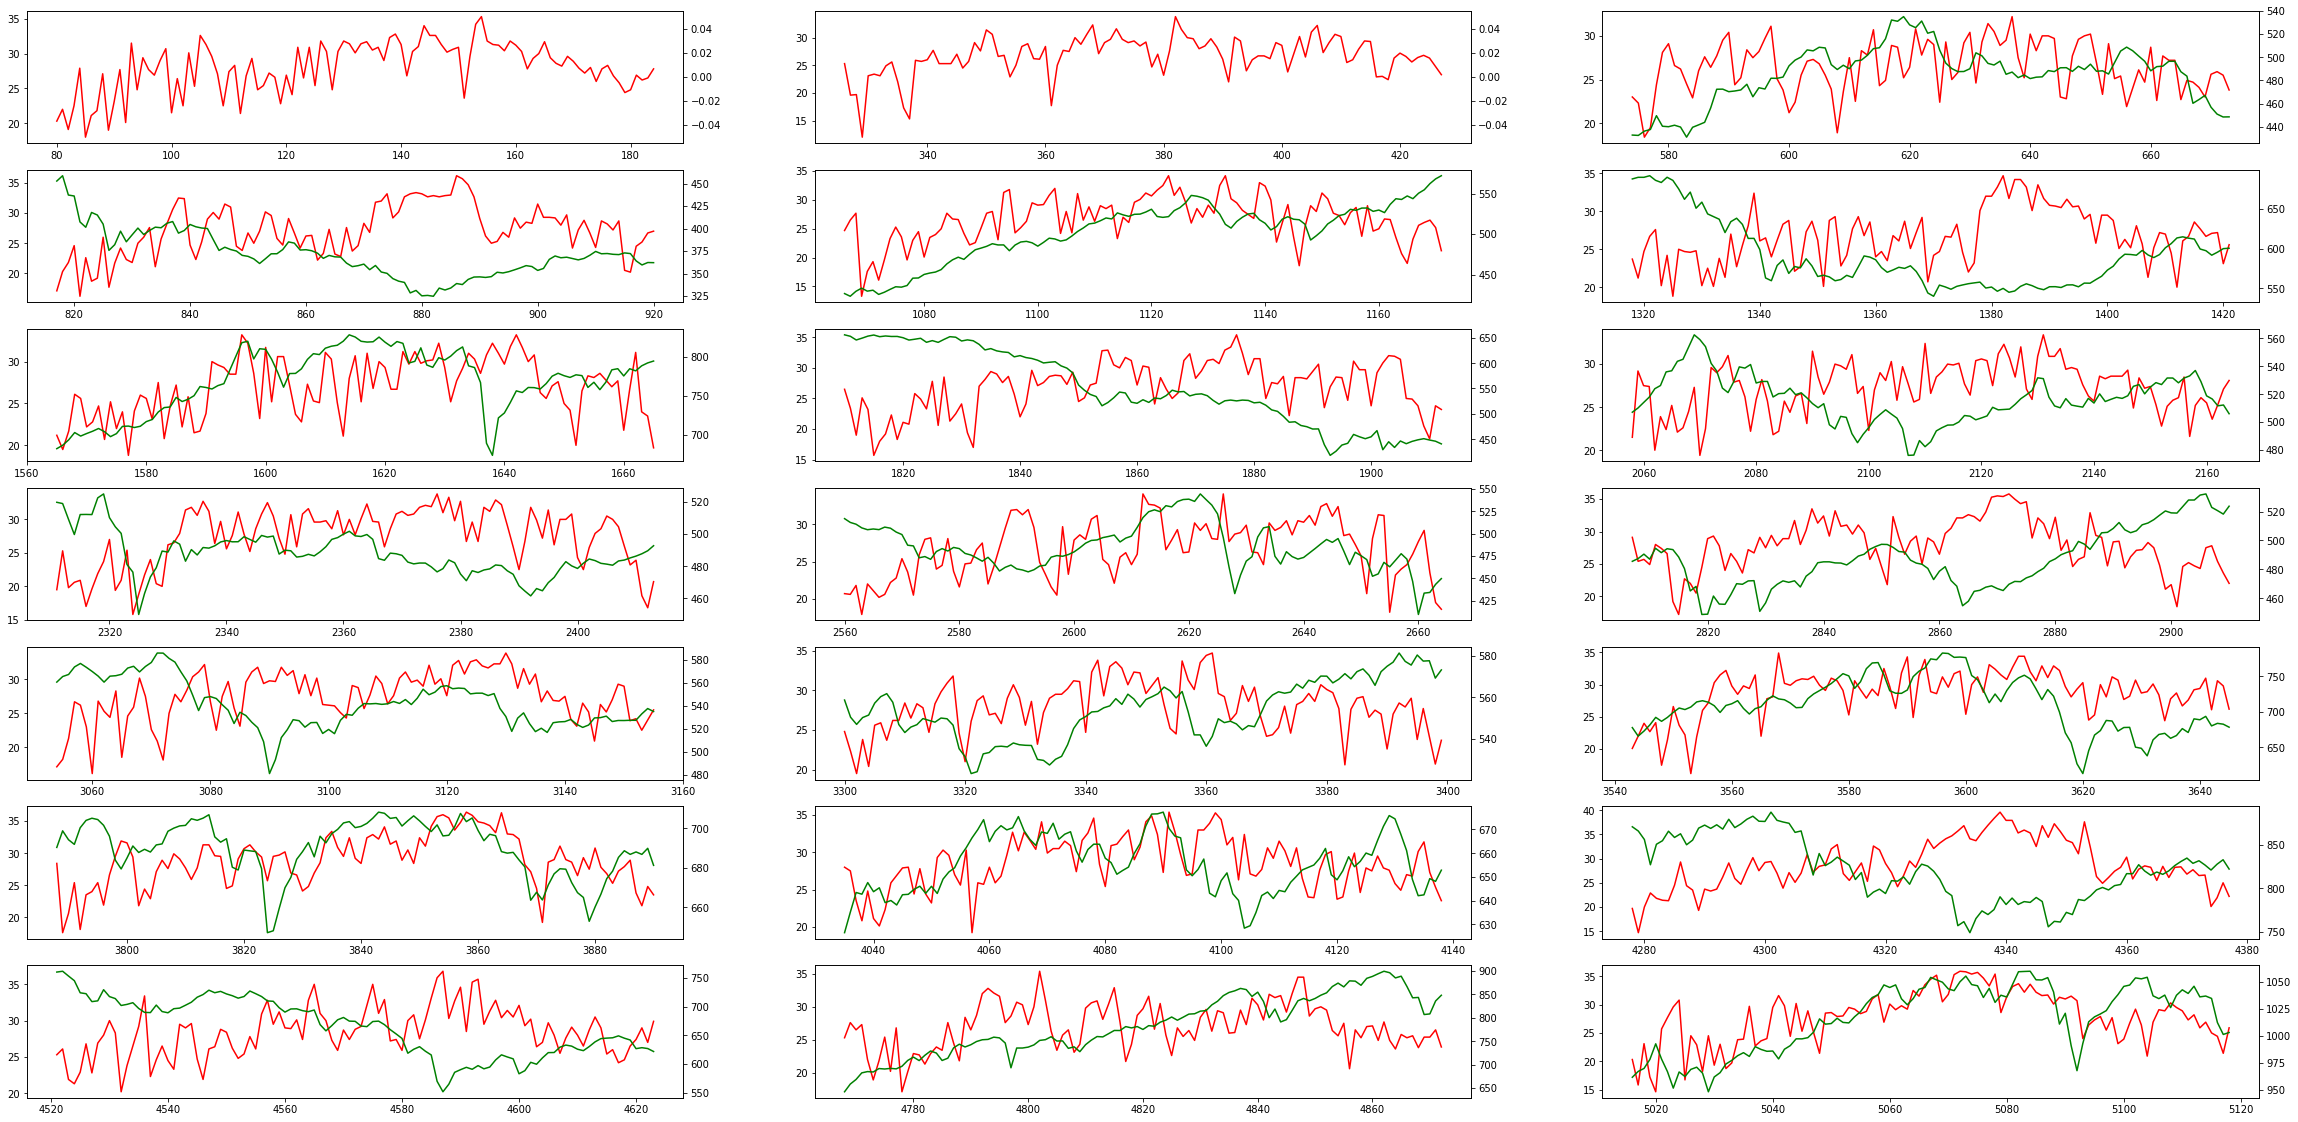

In [127]:
plt.figure(figsize = (40,20)) #2001년부터 2021년까지 최고기온과 kosdaq 총집합

for i in range(2001,2022):
    globals()['skd_{}'.format(i)] = skd[skd['date'].between('{}-05-01'.format(i),'{}-09-30'.format(i))]
    
    plt.subplot(7,3,i-2000)
    plt.plot(globals()['skd_{}'.format(i)]['최고기온(℃)'], color='red')
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.plot(globals()['skd_{}'.format(i)]['kosdaq'], color='green')
